### artificial_dune_slopes
Demonstrate reduction in overwash with increasingly gentle beach slopes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Stockdon (2006) runup calculations

In [2]:
def calcR2(H,T,slope,igflag=0):
    """
    %
    % [R2,S,setup, Sinc, SIG, ir] = calcR2(H,T,slope,igflag);
    %
    % Calculated 2% runup (R2), swash (S), setup (setup), incident swash (Sinc)
    % and infragravity swash (SIG) elevations based on parameterizations from runup paper
    % also Iribarren (ir)
    % August 2010 - Included 15% runup (R16) statistic that, for a Guassian distribution, 
    % represents mean+sigma. It is calculated as R16 = setup + swash/4.  
    % In a wave tank, Palmsten et al (2010) found this statistic represented initiation of dune erosion. 
    %
    %
    % H = significant wave height, reverse shoaled to deep water
    % T = deep-water peak wave period
    % slope = radians
    % igflag = 0 (default)use full equation for all data
    %        = 1  use dissipative-specific calculations when dissipative conditions exist (Iribarren < 0.3)
    %        = 2  use dissipative-specific (IG energy) calculation for all data
    %
    % based on:
    %  Stockdon, H. F., R. A. Holman, P. A. Howd, and J. Sallenger A. H. (2006),
    %    Empirical parameterization of setup, swash, and runup,
    %    Coastal Engineering, 53, 573-588.
    % author: hstockdon@usgs.gov
    # Converted to Python by csherwood@usgs.gov
    """
    g = 9.81

    # make slopes positive!
    slope = np.abs(slope)

    # compute wavelength and Iribarren
    L = (g*T**2) / (2.*np.pi)
    sqHL = np.sqrt(H*L)
    ir = slope/np.sqrt(H/L)

    if igflag == 2:                     # use dissipative equations (IG) for ALL data
        R2 = 1.1*(0.039 * sqHL)
        S = 0.046*sqHL
        setup = 0.016*sqHL

    elif igflag == 1 and ir < 0.3:      # if dissipative site use diss equations
        R2 = 1.1*(0.039 * sqHL)
        S = 0.046*sqHL
        setup = 0.016*sqHL

    else:                               # if int/ref site, use full equations
        setup = 0.35*slope*sqHL
        Sinc = 0.75*slope*sqHL
        SIG = 0.06*sqHL
        S = np.sqrt(Sinc**2 + SIG**2)
        R2 = 1.1*(setup + S/2.)
        R16 = 1.1*(setup + S/4.)

    return R2, S, setup, Sinc, SIG, ir, R16

#### Run through various (artificial) dune heights and calculate runup, assuming constant volume of sand

In [3]:
# specify incoming wave H, T
H = 4.
T = 12.

# specify constructed dune height and angle of repose for road-side slope
h_init=5
beta_repose = 30.

# calculate base distance r1 (run) of road-side half of dune
r1 = h_init/(np.tan(np.deg2rad(beta_repose)))

# area (volume per unit width)
a1 = 0.5*h_init*r1

# total initial volume assuming ocean-side is also at angle of repose. This area remains constant.
a = 2.*a1
print("Initial r1, a {:.2f}, {:.2f}:".format(r1,a))

# Array of crest heights
hlist = np.arange(h_init,.5,-.25)

# Arrays for results
runup=np.zeros_like(hlist)
tanbeta=np.zeros_like(hlist)
r2=np.zeros_like(hlist)

# loop through series of decreasing dune heights and calculate run-up
print("  h     a1   a2     r1    r2 tanbeta runup")
for i, h in enumerate(hlist):
    # new road-side base distance
    r1 = h/(np.tan(np.deg2rad(beta_repose)))
    
    # new road-side area
    a1 = 0.5*h*r1
    
    # conserve area; calculate ocean-side area and base distance
    # (dont confuse r2 with runup)
    a2 = a - a1
    r2[i] = 2.*a2/h
    
    # calculate beach slope and Stockdon runup elevation
    beta = np.arctan(h/r2[i])
    betad = np.rad2deg(beta)
    tanbeta[i]=h/r2[i]
    runup[i],_,_,_,_,_,_ = calcR2(H,T,beta)
    print("{:5.1f} {:5.1f} {:5.1f} {:5.1f} {:5.1f} {:6.3f} {:5.2f}".format(h,a1,a2,r1,r2[i],tanbeta[i],runup[i]))

Initial r1, a 8.66, 43.30:
  h     a1   a2     r1    r2 tanbeta runup
  5.0  21.7  21.7   8.7   8.7  0.577 12.60
  4.8  19.5  23.8   8.2  10.0  0.475 10.69
  4.5  17.5  25.8   7.8  11.5  0.393  9.06
  4.2  15.6  27.7   7.4  13.0  0.327  7.67
  4.0  13.9  29.4   6.9  14.7  0.272  6.49
  3.8  12.2  31.1   6.5  16.6  0.226  5.49
  3.5  10.6  32.7   6.1  18.7  0.187  4.63
  3.2   9.1  34.2   5.6  21.0  0.155  3.91
  3.0   7.8  35.5   5.2  23.7  0.127  3.30
  2.8   6.5  36.8   4.8  26.7  0.103  2.79
  2.5   5.4  37.9   4.3  30.3  0.082  2.37
  2.2   4.4  38.9   3.9  34.6  0.065  2.02
  2.0   3.5  39.8   3.5  39.8  0.050  1.75
  1.8   2.7  40.6   3.0  46.5  0.038  1.53
  1.5   1.9  41.4   2.6  55.1  0.027  1.36
  1.2   1.4  41.9   2.2  67.1  0.019  1.23
  1.0   0.9  42.4   1.7  84.9  0.012  1.14
  0.8   0.5  42.8   1.3 114.2  0.007  1.07


Text(0.5, 1.0, '$H_s$ = 4 m, $T$ = 12 s, $V$ = 43.3 m$^3$/m')

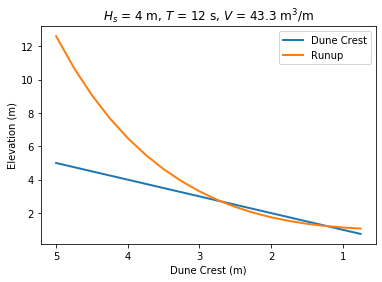

In [4]:
plt.plot(hlist,hlist,linewidth=2,label='Dune Crest')
plt.plot(hlist,runup,linewidth=2,label='Runup')
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('Dune Crest (m)')
plt.ylabel('Elevation (m)')
ts = "$H_s$ = {:.0f} m, $T$ = {:.0f} s, $V$ = {:.1f} m$^3$/m".format(H,T,a)
plt.title(ts)

Text(0.5, 1.0, '$H_s$ = 4 m, $T$ = 12 s, $V$ = 43.3 m$^3$/m')

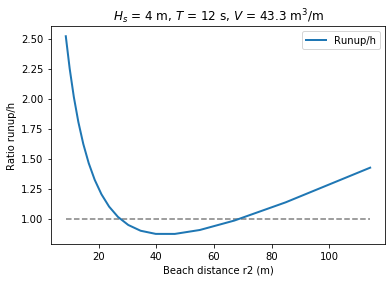

In [5]:
plt.plot(r2,np.ones_like(r2),'--',c='gray')
plt.plot(r2,runup/hlist,linewidth=2,label='Runup/h')
plt.legend()
plt.xlabel('Beach distance r2 (m)')
plt.ylabel('Ratio runup/h')
ts = "$H_s$ = {:.0f} m, $T$ = {:.0f} s, $V$ = {:.1f} m$^3$/m".format(H,T,a)
plt.title(ts)